In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
def plot(x,y):
    plt.scatter(x, y, alpha=0.5)
    plt.show()
    plt.savefig('x_vs_y.png')
    return
def encoding(df, dictionary, feature):
    encoded_df = df.copy()
    for key in dictionary.keys():
        encoded_df.loc[encoded_df[feature] == key, feature] = dictionary[key]
    return encoded_df

In [3]:
training_df = pd.read_csv("train.csv")
training_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
training_df.columns[training_df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
training_df['LotFrontage'].fillna(training_df["LotFrontage"].mean(), inplace = True)
training_df['GarageYrBlt'].fillna(training_df["GarageYrBlt"].mean(), inplace = True)
training_df['Electrical'].fillna(training_df["Electrical"].mode()[0], inplace = True)
training_df['Alley'].fillna("None", inplace = True)
training_df['FireplaceQu'].fillna("None", inplace = True)
training_df['GarageType'].fillna("None", inplace = True)
training_df['GarageFinish'].fillna("None", inplace = True)
training_df['GarageQual'].fillna("None", inplace = True)
training_df['GarageCond'].fillna("None", inplace = True)
training_df['PoolQC'].fillna("None", inplace = True)
training_df['Fence'].fillna("None", inplace = True)
training_df['MiscFeature'].fillna("None", inplace = True)
training_df['MasVnrType'].fillna("None", inplace = True)
training_df['BsmtQual'].fillna("None", inplace = True)
training_df['BsmtCond'].fillna("None", inplace = True)
training_df['BsmtQual'].fillna("None", inplace = True)
training_df['BsmtCond'].fillna("None", inplace = True)
training_df['BsmtFinType1'].fillna("None", inplace = True)
training_df['BsmtFinType2'].fillna("None", inplace = True)
training_df['BsmtExposure'].fillna("None", inplace = True)
training_df['MasVnrArea'].fillna(0, inplace = True)

In [6]:
training_df.columns[training_df.isnull().any()].tolist()

[]

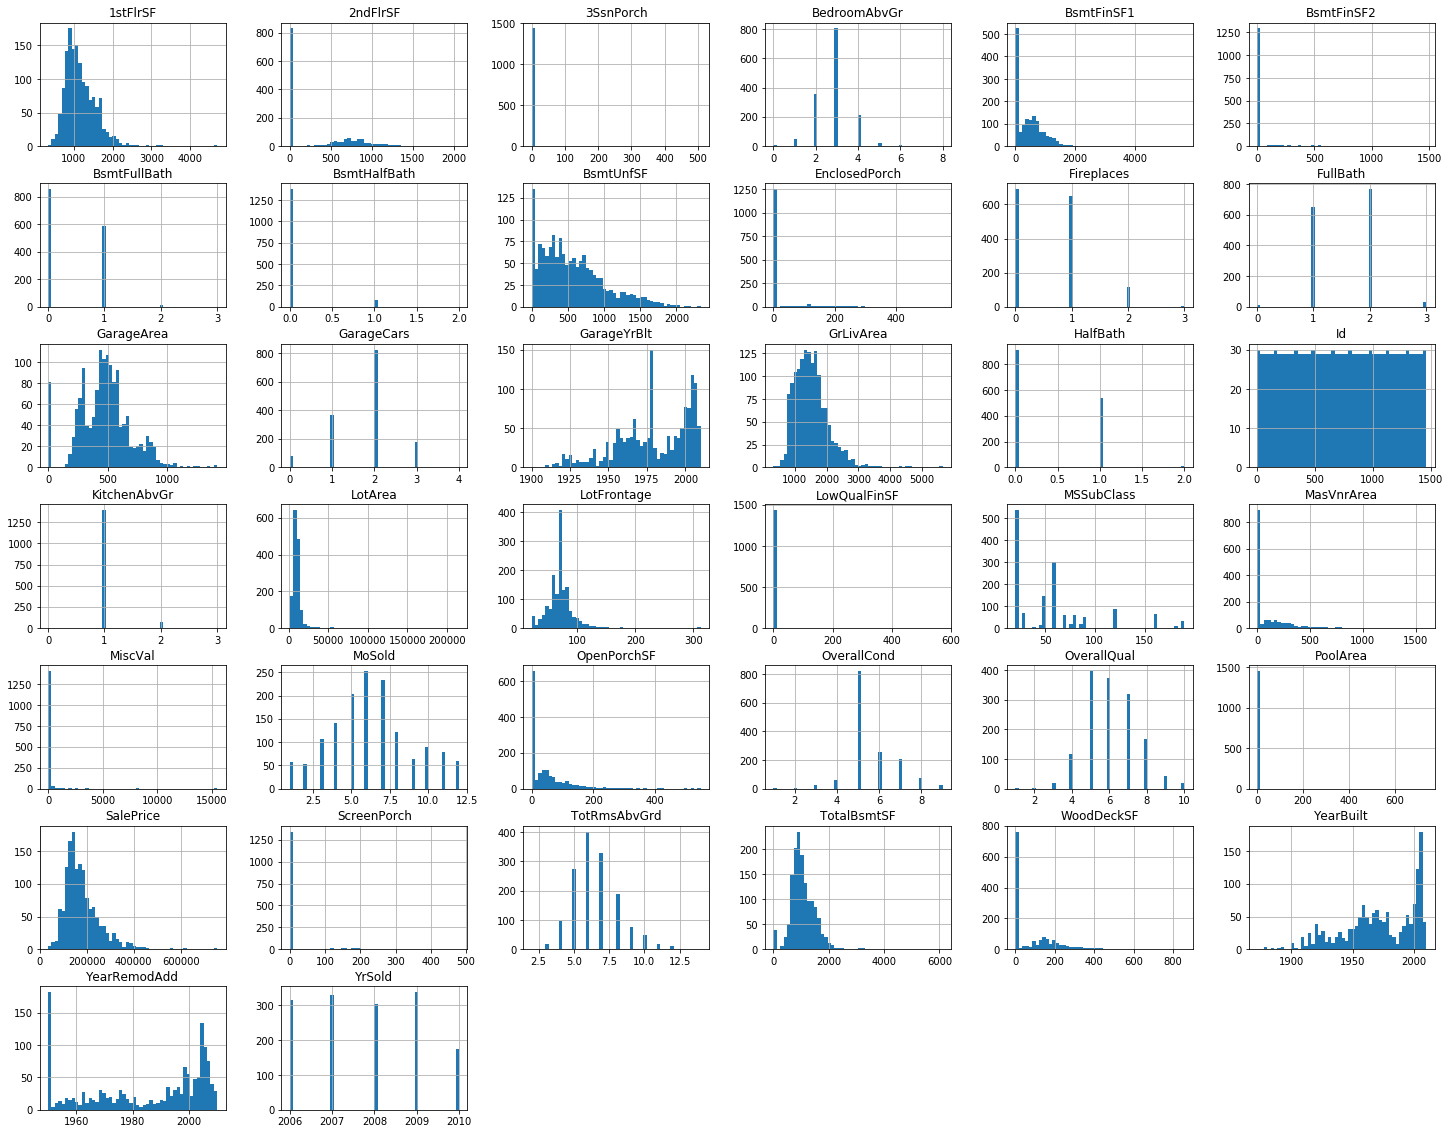

In [7]:
training_df.hist(bins=50, figsize = (25,20))
plt.show()

In [8]:
training_df['TotalSF'] = training_df['TotalBsmtSF'] + training_df['1stFlrSF'] + training_df['2ndFlrSF']

In [9]:
MSZoning_Dict = {"FV": 214014,
                 "RL": 191004,
                 "RH": 131558,
                 "RM": 126316,
                 "C (all)": 74528}
training_df = encoding(training_df, MSZoning_Dict, 'MSZoning')

In [10]:
Neighborhood_Dict = {"NoRidge": 335295,
                     "NridgHt": 316270,
                     "StoneBr": 310499,
                     "Timber": 242247,
                     "Veenker": 238772,
                     "Somerst": 225379,
                     "ClearCr": 212565,
                     "Crawfor": 210624,
                     "CollgCr": 197965,
                     "Blmngtn": 194870,
                     "Gilbert": 192854,
                     "NWAmes": 189050,
                     "SawyerW": 186555,
                     "Mitchel": 156270,
                     "NAmes": 145847,
                     "NPkVill": 142694,
                     "SWISU": 142591,
                     "Blueste": 137500,
                     "Sawyer": 136793,
                     "OldTown": 128225,
                     "Edwards": 128219,
                     "BrkSide": 124834,
                     "BrDale": 104493,
                     "IDOTRR": 100123,
                     "MeadowV": 98576}
training_df = encoding(training_df, Neighborhood_Dict, 'Neighborhood')

In [11]:
training_df['target']=np.log1p(training_df.SalePrice)
#del training_df['SalePrice']

In [12]:
training_df = training_df[training_df.GrLivArea < 4500].reset_index(drop = True)

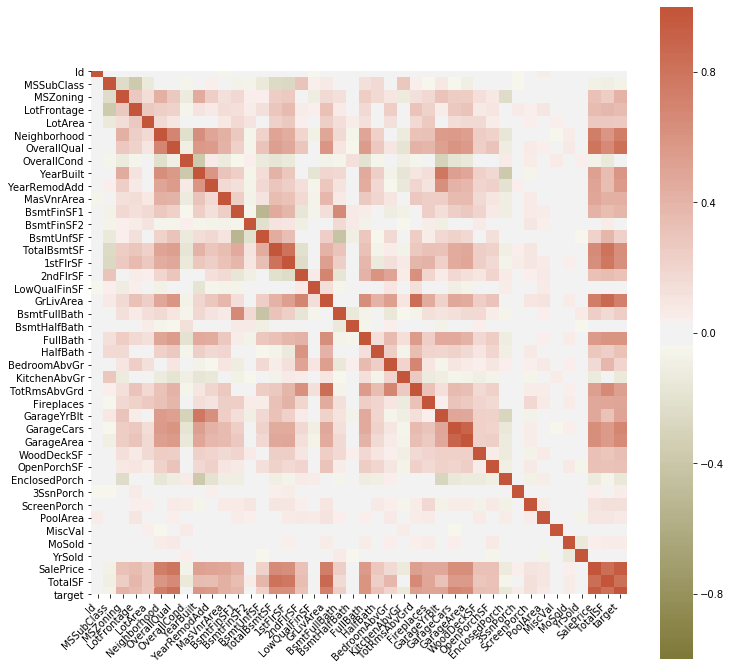

In [13]:
plt.figure(figsize=(12, 12))
corr = training_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(440,20, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
Qual_Dict = {"Ex": 5, 
             "Gd": 4, 
             "TA": 3, 
             "Fa": 2, 
             "Po": 1}
training_df = encoding(training_df, Qual_Dict, "ExterQual")
training_df = encoding(training_df, Qual_Dict, "ExterCond")

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


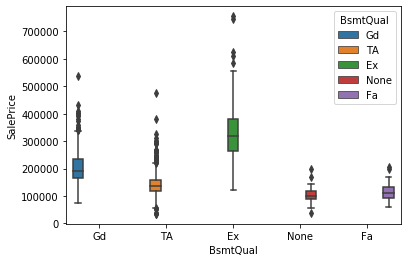

In [15]:
sns.boxplot(x="BsmtQual", y="SalePrice", hue="BsmtQual", data=training_df)

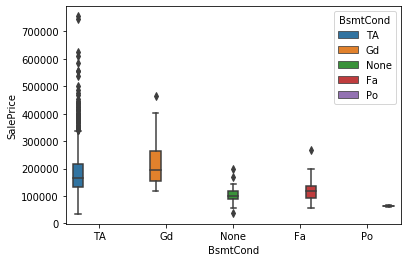

In [16]:
sns.boxplot(x="BsmtCond", y="SalePrice", hue="BsmtCond", data=training_df)

In [17]:
Bsmt_Dict = {"Ex": 5, 
             "Gd": 4, 
             "TA": 3, 
             "Fa": 2, 
             "Po": 1,
             "None": 2}
training_df = encoding(training_df, Bsmt_Dict, 'BsmtQual')
training_df = encoding(training_df, Bsmt_Dict, 'BsmtCond')

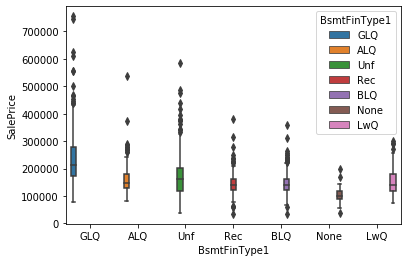

In [18]:
sns.boxplot(x="BsmtFinType1", y="SalePrice", hue="BsmtFinType1", data=training_df)

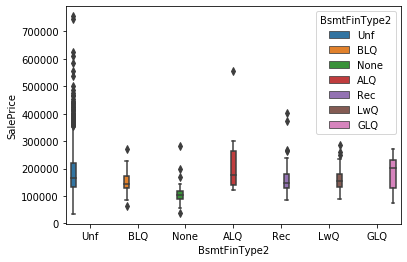

In [19]:
sns.boxplot(x="BsmtFinType2", y="SalePrice", hue="BsmtFinType2", data=training_df)

In [20]:
BsmtFinType_Dict = {"GLQ": 6,
                    "ALQ": 5, 
                    "BLQ": 4, 
                    "Rec": 3, 
                    "LwQ": 2, 
                    "Unf": 1,
                    "None": 0}
training_df = encoding(training_df, BsmtFinType_Dict, 'BsmtFinType1')
training_df = encoding(training_df, BsmtFinType_Dict, 'BsmtFinType2')

In [21]:
training_df = encoding(training_df, Qual_Dict, "HeatingQC")
training_df = encoding(training_df, Qual_Dict, "KitchenQual")

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


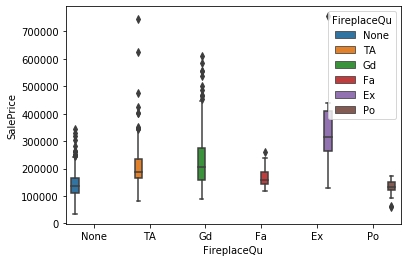

In [22]:
sns.boxplot(x="FireplaceQu", y="SalePrice", hue="FireplaceQu", data=training_df)

In [23]:
training_df = encoding(training_df, Bsmt_Dict, 'FireplaceQu')

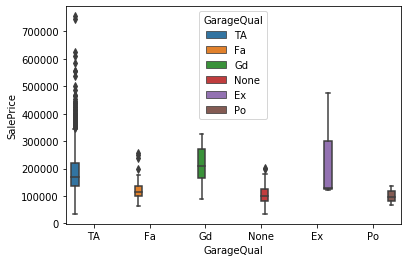

In [24]:
sns.boxplot(x="GarageQual", y="SalePrice", hue="GarageQual", data=training_df)

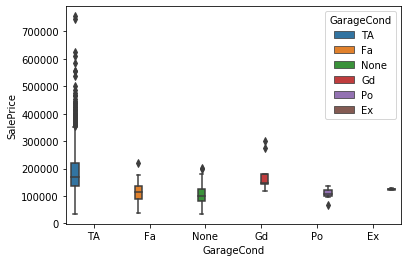

In [25]:
sns.boxplot(x="GarageCond", y="SalePrice", hue="GarageCond", data=training_df)

In [26]:
training_df = encoding(training_df, Bsmt_Dict, 'GarageQual')
training_df = encoding(training_df, Bsmt_Dict, 'GarageCond')

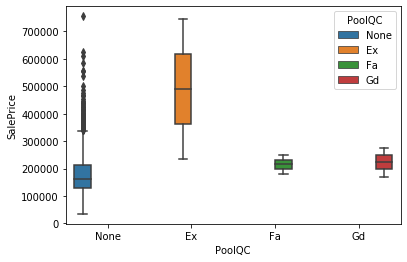

In [27]:
sns.boxplot(x="PoolQC", y="SalePrice", hue="PoolQC", data=training_df)

In [28]:
Pool_Dict = {"Ex": 5,
            "Gd": 4,
            "TA": 3,
            "Fa": 2,
            "None" : 1}
training_df = encoding(training_df, Pool_Dict, 'PoolQC')

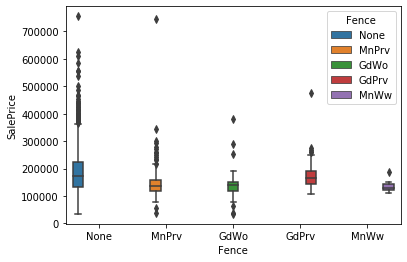

In [29]:
sns.boxplot(x="Fence", y="SalePrice", hue="Fence", data=training_df)

In [30]:
Fence_Dict = {"GdPrv": 4,
              "MnPrv": 3,
              "GdWo": 2, 
              "MnWw": 1,
              "None": 4}
training_df = encoding(training_df, Fence_Dict, 'Fence')

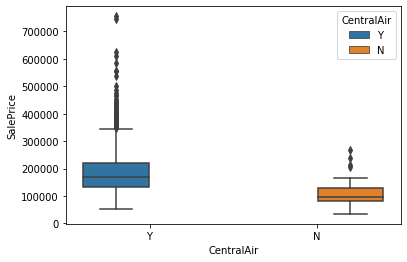

In [31]:
sns.boxplot(x="CentralAir", y="SalePrice", hue="CentralAir", data=training_df)

In [32]:
AC_Dict = {"Y": 1,
           "N": 0}
training_df = encoding(training_df, AC_Dict, 'CentralAir')

In [33]:
X_num = training_df[["MSSubClass", "LotFrontage","LotArea", "MSZoning", "Neighborhood", "OverallQual", 
                     "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea",  "BsmtFinSF1", "BsmtUnfSF", 
                     "TotalBsmtSF","1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "FullBath", 
                     "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", 
                     "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",  "ScreenPorch", 
                     "TotalSF"]]
X_cat = training_df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                     'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'CentralAir']]
X = np.hstack((X_cat, X_num))

In [34]:
y = training_df["target"]
y_actual = training_df["SalePrice"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    mape = np.mean(np.abs(y_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    
    
    y_trans_pred = regr.predict(X)
    y_act_pred = np.exp(y_trans_pred) - 1
    mape_actual = np.mean(np.abs(y_act_pred - y_actual)/y_actual)
    
    print(mape, mape_actual)

0.007442839375174473 0.08410114644851045
0.006860664277023073 0.08427405106538764
0.007450190605808845 0.0838986501466
0.007250828266636029 0.08440524870606028
0.0067476736766250486 0.08394882172034002


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr = xgb.XGBRegressor(objective ='reg:linear')
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    mape = np.mean(np.abs(y_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    
    
    y_trans_pred = regr.predict(X)
    y_act_pred = np.exp(y_trans_pred) - 1
    mape_actual = np.mean(np.abs(y_act_pred - y_actual)/y_actual)
    
    print(mape, mape_actual)

[09:10:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.00730498853652376 0.0691519446686867
[09:10:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.007589791981112268 0.07000588831832638
[09:10:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.007060386472724545 0.0666170298226113
[09:10:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.006721144377332324 0.06717335682682632
[09:10:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.006789574236405639 0.06774143305248696


In [37]:
from sklearn.neural_network import MLPRegressor
for i in range(5):
    X_train, X_test, y_trans_train, y_trans_test = train_test_split(X, y, test_size=0.2)
    #linear = LinearRegression()
    linear = xgb.XGBRegressor(objective ='reg:linear')
    linear.fit(X_train, y_trans_train)
    residual = y_trans_train - linear.predict(X_train)
    #plot(y_train, linear.predict(X_train[:,:14]))
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 200)
    #rf = MLPRegressor(hidden_layer_sizes = (20,20,20), max_iter = 2000, learning_rate = 'adaptive', n_iter_no_change = 100, verbose = True)
    rf.fit(X_train,residual)
    
    
    y_test_trans_pred = rf.predict(X_test) + linear.predict(X_test)
    y_train_trans_pred = rf.predict(X_train) + linear.predict(X_train)
    #plot(y_train, y_train_pred)
    #plot(y_test, y_test_pred)
    mape_test = np.mean(np.abs(y_test_trans_pred - y_trans_test)/y_trans_test)
    mape_train = np.mean(np.abs(y_train_trans_pred - y_trans_train)/y_trans_train)
    
    
    y_trans_pred = rf.predict(X) + linear.predict(X)
    y_act_pred = np.exp(y_trans_pred) - 1
    mape_actual = np.mean(np.abs(y_act_pred - y_actual)/y_actual)
    print(mape_test, mape_train, mape_actual)

[09:10:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.006634450511396392 0.001983141480584548 0.03490759581440601
[09:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.007063082495747184 0.0019498101471033162 0.035928560208108404
[09:10:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.007562659436491661 0.0019047625677390651 0.036702332116695144
[09:10:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.006503004124480981 0.0020111346505923347 0.03529593342613014
[09:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.006339486691348556 0.0019828798259973806 0.03441715011378663


In [38]:
testing_df = pd.read_csv("test.csv")
testing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [39]:
testing_df.columns[testing_df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [40]:
testing_df['LotFrontage'].fillna(training_df["LotFrontage"].mean(), inplace = True)
testing_df['MasVnrArea'].fillna(training_df["MasVnrArea"].mean(), inplace = True)
testing_df['MasVnrType'].fillna(training_df["MasVnrType"].mode()[0], inplace = True)
testing_df['BsmtQual'].fillna(training_df["BsmtQual"].mode()[0], inplace = True)
testing_df['BsmtCond'].fillna(training_df["BsmtCond"].mode()[0], inplace = True)
testing_df['BsmtFinType1'].fillna(training_df["BsmtFinType1"].mode()[0], inplace = True)
testing_df['BsmtFinType2'].fillna(training_df["BsmtFinType2"].mode()[0], inplace = True)
testing_df['Electrical'].fillna(training_df["Electrical"].mode()[0], inplace = True)
testing_df['KitchenQual'].fillna(training_df["KitchenQual"].mode()[0], inplace = True)
testing_df['Alley'].fillna("None", inplace = True)
testing_df['FireplaceQu'].fillna("None", inplace = True)
testing_df['GarageType'].fillna("None", inplace = True)
testing_df['GarageFinish'].fillna("None", inplace = True)
testing_df['GarageQual'].fillna("None", inplace = True)
testing_df['GarageCond'].fillna("None", inplace = True)
testing_df['PoolQC'].fillna("None", inplace = True)
testing_df['Fence'].fillna("None", inplace = True)
testing_df['MiscFeature'].fillna("None", inplace = True)
testing_df['BsmtQual'].fillna("None", inplace = True)
testing_df['BsmtCond'].fillna("None", inplace = True)
testing_df['BsmtFinType1'].fillna("None", inplace = True)
testing_df['BsmtFinType2'].fillna("None", inplace = True)
testing_df['BsmtExposure'].fillna(0, inplace = True)
testing_df['GarageYrBlt'].fillna(0, inplace = True)
testing_df['TotalBsmtSF'].fillna(0, inplace = True)
testing_df['BsmtFullBath'].fillna(0, inplace = True)
testing_df['BsmtHalfBath'].fillna(0, inplace = True)
testing_df['BsmtFinSF1'].fillna(0, inplace = True)
testing_df['BsmtFinSF2'].fillna(0, inplace = True)
testing_df['BsmtUnfSF'].fillna(0, inplace = True)
testing_df['GarageCars'].fillna(0, inplace = True)
testing_df['GarageArea'].fillna(0, inplace = True)

In [41]:
testing_df.columns[testing_df.isna().any()].tolist()

['Utilities', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']

In [42]:
testing_df = encoding(testing_df, MSZoning_Dict, 'MSZoning')
testing_df = encoding(testing_df, Neighborhood_Dict, 'Neighborhood')

In [43]:
testing_df['TotalSF'] = testing_df['TotalBsmtSF'] + testing_df['1stFlrSF'] + testing_df['2ndFlrSF']

In [44]:
testing_df = encoding(testing_df, Qual_Dict, "ExterQual")
testing_df = encoding(testing_df, Qual_Dict, "ExterCond")
testing_df = encoding(testing_df, Qual_Dict, "HeatingQC")
testing_df = encoding(testing_df, Qual_Dict, "KitchenQual")
testing_df = encoding(testing_df, Bsmt_Dict, "BsmtQual")
testing_df = encoding(testing_df, Bsmt_Dict, "BsmtCond")
testing_df = encoding(testing_df, BsmtFinType_Dict, "BsmtFinType1")
testing_df = encoding(testing_df, BsmtFinType_Dict, "BsmtFinType2")
testing_df = encoding(testing_df, Qual_Dict, "HeatingQC")
testing_df = encoding(testing_df, Qual_Dict, "KitchenQual")
testing_df = encoding(testing_df, Bsmt_Dict, 'FireplaceQu')
testing_df = encoding(testing_df, Bsmt_Dict, 'GarageQual')
testing_df = encoding(testing_df, Bsmt_Dict, 'GarageCond')
testing_df = encoding(testing_df, Pool_Dict, 'PoolQC')
testing_df = encoding(testing_df, Fence_Dict, 'Fence')
testing_df = encoding(testing_df, AC_Dict, 'CentralAir')

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [45]:
testing_df['target']=np.log1p(testing_df.SalePrice)

In [46]:
X_test_num = testing_df[["MSSubClass", "LotFrontage","LotArea", "MSZoning", "Neighborhood", "OverallQual", 
                         "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea",  "BsmtFinSF1", "BsmtUnfSF", 
                         "TotalBsmtSF","1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "FullBath", 
                         "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt",
                         "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch", 
                         "TotalSF"]]
X_test_cat = testing_df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                         'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'CentralAir']]
X_test = np.hstack((X_test_cat, X_test_num))
X_test.shape

(1459, 45)

In [47]:
y_test = testing_df["target"]
y_test_actual = testing_df["SalePrice"]
print(y_test.shape, y_test_actual.shape)

(1459,) (1459,)


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


(1458,)


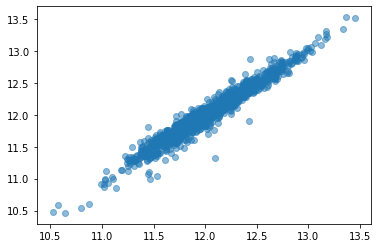

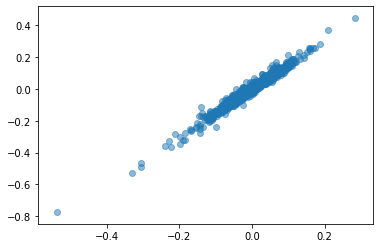

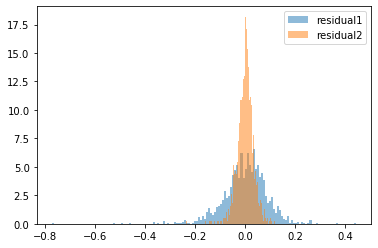

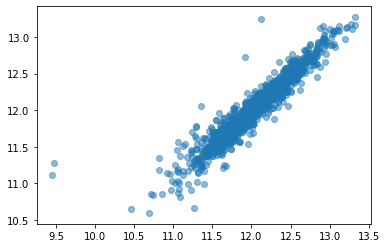

0.0020244784301650443 0.0872436957148257


<Figure size 432x288 with 0 Axes>

In [73]:
from sklearn.neural_network import MLPRegressor

def residual_compare(res1, res2, n_bins = 150):
    plt.hist(res1, n_bins, alpha=0.5, label='residual1', density=True)
    plt.hist(res2, n_bins, alpha=0.5, label='residual2', density=True)
    plt.legend(loc='upper right')
    plt.show()
    return

X_train = X
y_trans_train = y
best_mape = 1000000000
for i in range(1):
    #linear = LinearRegression()
    linear = xgb.XGBRegressor(objective ='reg:squarederror',eta = 0.001)
    linear.fit(X_train, y_trans_train)
    residual_1 = y_trans_train - linear.predict(X_train)
    print(residual_1.shape)
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 200)
    rf.fit(X_train,residual_1)
    plot(linear.predict(X_train), y_trans_train)

    plot(rf.predict(X_train), residual_1)
    
    y_trans_train_pred = rf.predict(X_train) + linear.predict(X_train)
    residual_2 = y_trans_train - y_trans_train_pred
    residual_compare(residual_1, residual_2)

    mape_train_trans = np.mean(np.abs(y_trans_train_pred - y_trans_train)/y_trans_train)
    
    y_trans_pred = rf.predict(X_test) + linear.predict(X_test)
    y_act_pred = np.exp(y_trans_pred) - 1
    mape_actual = np.mean(np.abs(y_act_pred - y_test_actual)/y_test_actual)
    
    plot(y_test, y_trans_pred)
    
    print(mape_train_trans, mape_actual)
    
    prediction = y_act_pred

In [82]:
prediction

[121190.71421054697,
 166888.01302754233,
 200710.61291574745,
 196387.96360255944,
 196697.66008492472,
 170528.73120935226,
 173799.23126691775,
 165796.16040491953,
 182911.41714377663,
 122742.34193433165,
 191536.43436932375,
 90314.0153160198,
 100243.49020449698,
 153323.87830833564,
 119405.59055672701,
 385346.48608798155,
 264388.42778551887,
 295340.0055420597,
 282653.133832057,
 512378.91618678166,
 324236.52556235605,
 206730.0559040722,
 167104.33471547504,
 165775.0503870238,
 178412.09237944207,
 198102.13325529307,
 342579.66214638395,
 225548.41096874943,
 208053.13535504058,
 207248.184077702,
 187030.54331818767,
 99556.98069430963,
 175206.30535423168,
 299492.27120277897,
 298799.5635604986,
 217154.87193081502,
 173943.2908826261,
 159734.22738255994,
 157647.40408995477,
 153121.7767322762,
 171056.22466873546,
 148583.15894624943,
 312273.4015270204,
 241350.29004851045,
 221861.45806302014,
 199641.07765613592,
 269259.892421292,
 200783.7179119564,
 165173.1